In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle("../datasets/processed/high_density_defects/BN/data.pickle.gz")

In [9]:
predictions = pd.read_csv(
    "../datasets/predictions/BN_pilot/band_gap_from_eigenvalue_band_properties/megnet_pytorch-sparse-z-were-200.csv.gz",
    index_col="_id")

In [15]:
target = "band_gap_from_eigenvalue_band_properties"
target_preds = "predicted_band_gap_from_eigenvalue_band_properties_test"

In [42]:
errors = predictions[target_preds] - data[target]

In [43]:
import numpy as np

In [44]:
np.abs(errors).mean()

0.4088529321426392

In [26]:
data["defect_count"] = data.defect_representation.apply(len)

In [31]:
data["abs_error"] = np.abs(errors)

In [33]:
err_from_count = data.groupby("defect_count").abs_error.mean()

In [34]:
import matplotlib.pyplot as plt

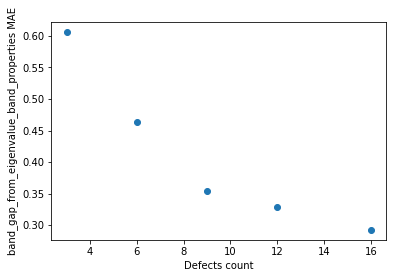

In [47]:
fig, ax = plt.subplots()
ax.scatter(err_from_count.index, err_from_count.values)
ax.set_xlabel("Defects count")
ax.set_ylabel(f"{target} MAE")
fig.savefig("target_error_from_count.png", dpi=300, bbox_inches='tight')